In [48]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics,model_selection,preprocessing
import pandas as pd


In [20]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [21]:
x_train=x_train/255
x_test=x_test/255

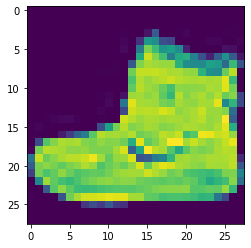

In [22]:
plt.imshow(x_train[0])

In [23]:
y_train[0]

9

In [24]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [25]:
x_train.shape

(60000, 784)

In [26]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [27]:
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))

In [28]:
y_train_hot[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [29]:
x_val=x_train[:5000]
y_val=y_train_hot[:5000]
x_train=x_train[5000:]
y_train_hot=y_train_hot[5000:]

In [56]:
#create the model 
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(784)),
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  tf.keras.layers.Dropout(0.4),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_3'),
                                  tf.keras.layers.Dropout(0.4),
                                  tf.keras.layers.Dense(units=512,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_4'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(units=1024,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_5'),
                                  tf.keras.layers.Dropout(0.6),
                                  tf.keras.layers.Dense(units=512,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_6'),
                                  tf.keras.layers.Dropout(0.4),
                                  tf.keras.layers.Dense(units=10,activation=tf.nn.softmax,name='output')
])

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
layer_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
layer_4 (Dense)              (None, 512)              

In [58]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

In [59]:
model.fit(x=x_train,y=y_train_hot,batch_size=32,epochs=10,validation_data=(x_val,y_val))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.9129 - acc: 0.6777 - val_loss: 0.5213 - val_acc: 0.8136
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6701 - acc: 0.7690 - val_loss: 0.4862 - val_acc: 0.8174
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6569 - acc: 0.7763 - val_loss: 0.4416 - val_acc: 0.8482
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6356 - acc: 0.7865 - val_loss: 0.4772 - val_acc: 0.8554
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6326 - acc: 0.7908 - val_loss: 0.4649 - val_acc: 0.8416
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6240 - acc: 0.7952 - val_loss: 0.4735 - val_acc: 0.8496
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6307 - acc: 0.7955 - val_loss: 0.4550 - val_acc: 0.8490
Epoch 8/10
1719/1719 [==============================] -

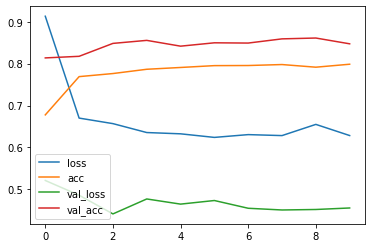

In [60]:
hist_df=pd.DataFrame(model.history.history)
hist_df.plot()

In [61]:
pred=model.predict(x_test)

In [66]:
tf.argmax(pred,axis=-1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [67]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [82]:
acc=tf.reduce_mean(tf.metrics.categorical_accuracy(y_test_hot,pred))
print('acc:',acc)
loss=tf.reduce_mean(tf.metrics.categorical_crossentropy(y_test_hot,pred))
print('loss:',loss)
pr=metrics.precision_score(y_test,np.argmax(pred,-1),average='weighted')
print('pr:',pr)
re=metrics.recall_score(y_test,np.argmax(pred,-1),average='weighted')
print('re:',re)
confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(pred,-1))

acc: tf.Tensor(0.8291, shape=(), dtype=float32)
loss: tf.Tensor(0.50246954, shape=(), dtype=float32)
pr: 0.8472787975928915
re: 0.8291


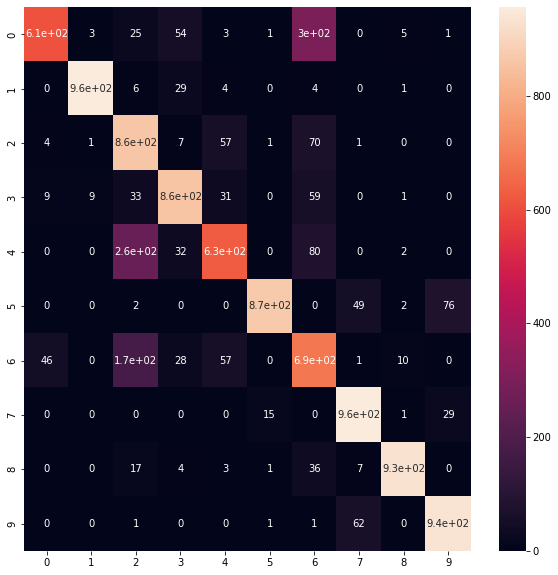

In [86]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True,)

In [87]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [105]:
data_df=pd.read_csv('/content/train.csv')

In [106]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [107]:
x=data_df.tweet
y=data_df.label

In [108]:
x

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

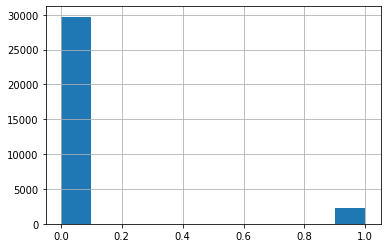

In [109]:
y.hist()

In [110]:
sum(y==1)

2242

In [111]:
data_y_ones=data_df[(y==1) ]
data_y_zeros=data_df[(y==0) ].iloc[:2242]

In [115]:
new_data_df=data_y_ones.append(data_y_zeros)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f925f0b4d90>,
      dtype=object)

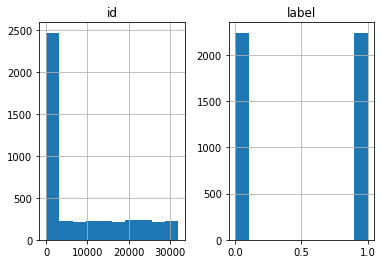

In [116]:
new_data_df.hist()

In [117]:
x=new_data_df.tweet
y=new_data_df.label

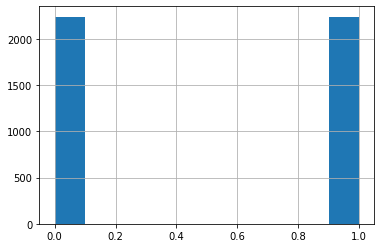

In [118]:
y.hist()

In [119]:
x

13      @user #cnn calls #michigan middle school 'buil...
14      no comment!  in #australia   #opkillingbay #se...
17                                 retweet if you agree! 
23        @user @user lumpy says i am a . prove it lumpy.
34      it's unbelievable that in the 21st century we'...
                              ...                        
2404    found my future husband on the plane to marbs ...
2405     , excited, clapping, unbreakable kimmy schmid...
2406    not long until the england v wales match! the ...
2407               nude rear naughty naked school girls  
2408    "uk now has the highest average level of stude...
Name: tweet, Length: 4484, dtype: object

In [131]:
tokinzer=tf.keras.preprocessing.text.Tokenizer(num_words=5000,)
tokinzer.fit_on_texts(x)
new_x=tokinzer.texts_to_sequences(x)
new_x=tf.keras.preprocessing.sequence.pad_sequences(new_x,maxlen=len(max(new_x,key=len)),padding='post')

In [134]:
new_x.shape

(4484, 30)

In [135]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(new_x,y,test_size=0.1,stratify=y,random_state=42)

In [166]:
#create the model 
#create the model 
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(30)),
                                  tf.keras.layers.Embedding(5000,30),
                                  tf.keras.layers.Flatten(),
                                  
                                  tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
                                  
])

In [167]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 30)            150000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 901       
Total params: 150,901
Trainable params: 150,901
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.BinaryCrossentropy(),metrics=['acc'])

In [169]:
model.fit(x=x_train,y=y_train,batch_size=64,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f92ec64e830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


64/64 [==============================] - 51s 8ms/step - loss: 0.6739 - acc: 0.6188 - val_loss: 0.6467 - val_acc: 0.6682
Epoch 2/100
64/64 [==============================] - 0s 6ms/step - loss: 0.5840 - acc: 0.7544 - val_loss: 0.5626 - val_acc: 0.7149
Epoch 3/100
64/64 [==============================] - 0s 6ms/step - loss: 0.4550 - acc: 0.8260 - val_loss: 0.4784 - val_acc: 0.7751
Epoch 4/100
64/64 [==============================] - 0s 6ms/step - loss: 0.3354 - acc: 0.8969 - val_loss: 0.4095 - val_acc: 0.8330
Epoch 5/100
64/64 [==============================] - 0s 6ms/step - loss: 0.2491 - acc: 0.9413 - val_loss: 0.3740 - val_acc: 0.8396
Epoch 6/100
64/64 [==============================] - 0s 6ms/step - loss: 0.1876 - acc: 0.9569 - val_loss: 0.3504 - val_acc: 0.8530
Epoch 7/100
64/64 [==============================] - 0s 6ms/step - loss: 0.1449 - acc: 0.9710 - val_loss: 0.3376 - val_acc: 0.8597
Epoch 8/100
64/64 [==============================] - 0s 6ms/step - loss: 0.1142 - acc: 0.9799 

KeyboardInterrupt: ignored

In [171]:
data_df=pd.read_csv('/content/sample_data/california_housing_train.csv')
data_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [172]:
x=data_df.iloc[:,:-1]
y=data_df.iloc[:,-1]

In [173]:
x.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100


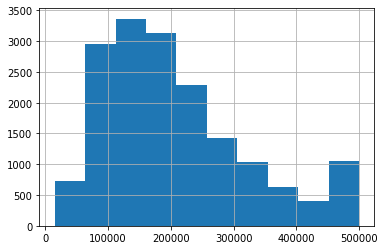

In [175]:
y.hist()

In [178]:
x_norm=preprocessing.StandardScaler()
new_x=x_norm.fit_transform(x)
y_norm=preprocessing.MinMaxScaler()
new_y=y_norm.fit_transform(np.array(y).reshape(-1,1))

In [180]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(new_x,new_y,test_size=0.1,random_state=42)

In [184]:

#create the model 
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(8)),
                                  tf.keras.layers.Dense(units=64,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(units=1,activation=tf.nn.relu)
])


In [185]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.MeanSquaredError())

In [186]:
model.fit(x=x_train,y=y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
479/479 [==============================] - 2s 4ms/step - loss: 0.2011 - val_loss: 0.1694
Epoch 2/100
479/479 [==============================] - 2s 3ms/step - loss: 0.1305 - val_loss: 0.0468
Epoch 3/100
479/479 [==============================] - 2s 3ms/step - loss: 0.0553 - val_loss: 0.0275
Epoch 4/100
479/479 [==============================] - 2s 3ms/step - loss: 0.0302 - val_loss: 0.0219
Epoch 5/100
479/479 [==============================] - 2s 3ms/step - loss: 0.0244 - val_loss: 0.0200
Epoch 6/100
479/479 [==============================] - 2s 3ms/step - loss: 0.0227 - val_loss: 0.0231
Epoch 7/100
479/479 [==============================] - 2s 3ms/step - loss: 0.0215 - val_loss: 0.0183
Epoch 8/100
479/479 [==============================] - 2s 3ms/step - loss: 0.0207 - val_loss: 0.0183
Epoch 9/100
479/479 [==============================] - 2s 3ms/step - loss: 0.0199 - val_loss: 0.0173
Epoch 10/100
479/479 [==============================] - 2s 3ms/step - loss: 0.0193 - val_lo